In [1]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
import csv
import pandas as pd

In [2]:
Re = 102500
n_modes = 10

mat = scipy.io.loadmat('D:\Documents\Year 3\FEEG3003 - IP\github_repo\A10PIVuv.mat')
data = list(mat.items())

u = data[7]
u_mean = data[9]
v = data[8]
v_mean = data[10]
x = data[11]
y = data[12]
ts = data[3][1][0][0] # time step between snapshots
print(np.shape(u), u[0], np.shape(u_mean), u_mean[0], np.shape(v), v[0], np.shape(v_mean), v_mean[0])

samples = len(u[1])             # number of snapshots in input data
h = len(u[1][1][1])             # height of matrix = y
l = len(u[1][1])                # length of matrix = x
h_trunc = 35                    # y truncation for input data
l_trunc = 150                   # x truncation for input data
t_trunc = samples                 # number of time snapshots for SVD

print(samples, h, l)

(2,) u (2,) u_mean (2,) v (2,) v_mean
3499 66 186


D:\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:1970: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


()
10


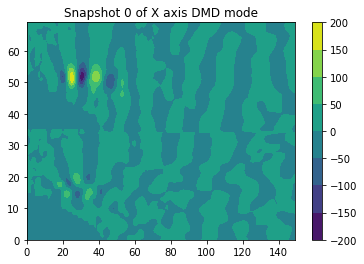

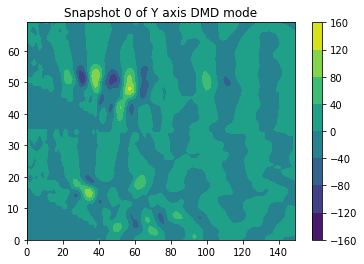

In [3]:
with open("dmd_10_F.csv", mode='r') as csvfile:
    data = csv.reader(csvfile)
    dmd = list(data)
    print(np.shape(dmd[0][0]))
with open("dmd_F_10_freqs.csv", mode='r') as csvfile:
    data = csv.reader(csvfile)
    freqs = list(data)
    
len_d = int(len(dmd)/2) #number of modes from data
print(len_d)
Z = []

for j in range(0,len_d):
    #manipulating modes so stacked velocity datasets are spatially aligned (dmd requires fliplr)
    #print(np.shape(dmd[0]))
    d_temp = np.reshape(dmd[len(dmd)-2-j*2],(h_trunc*2,l_trunc))
    Z.append(d_temp.astype(float))
    
fig, ax = plt.subplots()
cs = ax.contourf(Z[0])
ax.set_title('Snapshot 0 of X axis DMD mode')
fig.colorbar(cs, ax=ax)
plt.plot()
fig.canvas.draw()
fig, ax = plt.subplots()
cs = ax.contourf(Z[1])
ax.set_title('Snapshot 0 of Y axis DMD mode')
fig.colorbar(cs, ax=ax)
plt.plot()
fig.canvas.draw()

(10, 70, 150)
(5, 35, 150) (5, 35, 150)
(5, 35, 150) (5, 35, 150)


D:\Anaconda3\lib\site-packages\numpy\ma\core.py:2829: ComplexWarning: Casting complex values to real discards the imaginary part
  _data = np.array(data, dtype=dtype, copy=copy,


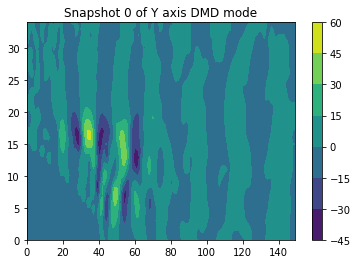

In [4]:
print(np.shape(Z))
real = []
imag = []

A = [] #   du(^)_1 / dx_2
B = [] # - du(^)_1 / dx_1

C = [] #   du(^)_2 / dx_2
D = [] # - du(^)_2 / dx_1

for i in range(0, int(len_d/2)):
    real.append(np.vsplit(Z[i], 2)) #real V, U components
    imag.append(np.vsplit(Z[int(len_d/2)+i], 2)) #imaginary V, U components
    
    DMD_mode = np.vectorize(complex)(real[i][0], imag[i][0])
    #print(i, np.shape(DMD_mode), np.shape(Z[i]))
    [a,b] = np.gradient(DMD_mode) # X gradients in x, y
    A.append(a)
    B.append(b) # no (-) to get correct gradient
    
    DMD_mode = np.vectorize(complex)(real[i][1], imag[i][1])
    #print(i, np.shape(DMD_mode), np.shape(Z[i]))
    [c,d] = np.gradient(DMD_mode) # Y gradient
    C.append(c)
    D.append(d) # no (-) to get correct gradient
    
print(np.shape(A), np.shape(B))
print(np.shape(C), np.shape(D))



fig, ax = plt.subplots()
cs = ax.contourf(D[1])
ax.set_title('Snapshot 0 of Y axis DMD mode')
fig.colorbar(cs, ax=ax)
plt.plot()
fig.canvas.draw()

In [5]:
k = 4

Snapshot used is 4



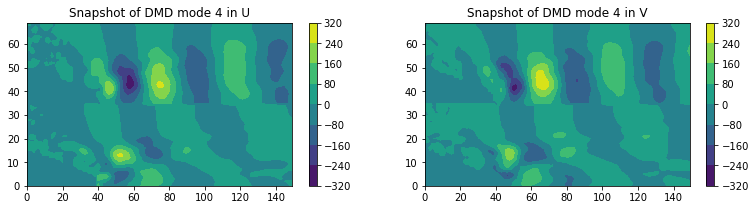

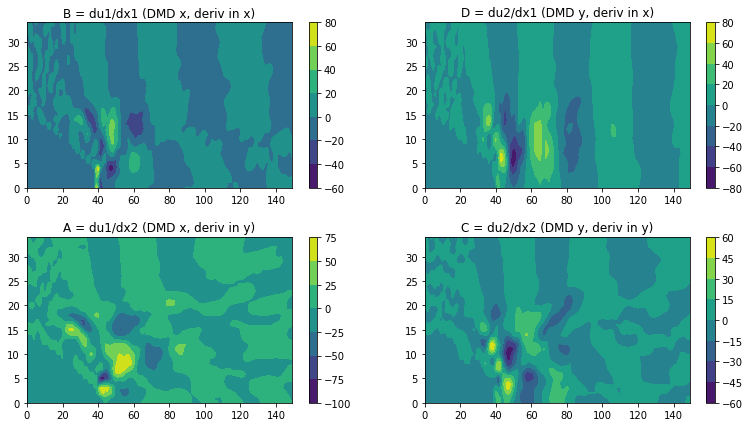

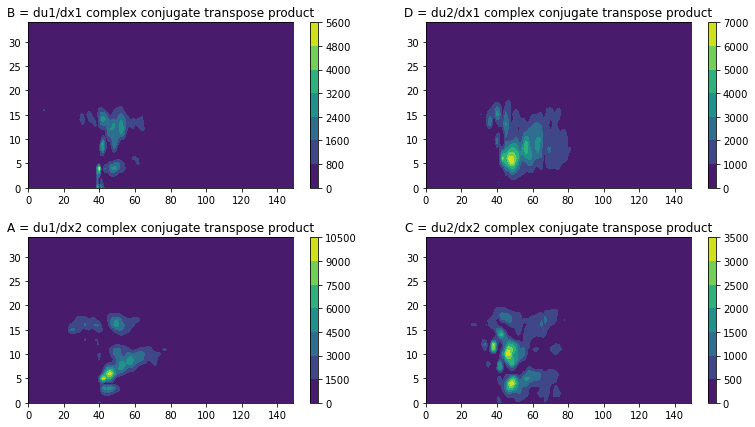

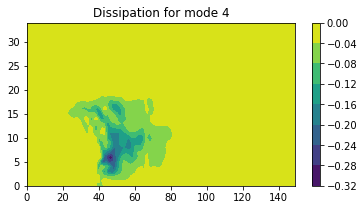

In [6]:
#fig, ax = plt.subplots()
#cs = ax.contourf(Z[0])
#ax.set_title('Dissipation')
#plt.plot()
#fig.canvas.draw()

# Capital letters represent gradient matrices of the modes
# A is gradient in y for POD in x; du_1 / dx_2
# B is gradient in x for POD in x; du_1 / dx_1
# C is gradient in y for POD in y; du_2 / dx_2
# D is gradient in x for POD in y; du_2 / dx_1
# PLOT GENERATES X GRAD IN FIRST ROW, Y GRAD IN SECOND ROW
# POD IN X FIRST COLUMN, POD IN Y SECOND COLUMN

# B D
# A C
print("Snapshot used is " + str(k) + "\n")

fig, axes = plt.subplots(1, 2, figsize = (15,3))
n = 0
term = [Z[k],Z[int(len_d/2)+k]]
term_name = ["Snapshot of DMD mode "+ str(k) +" in U","Snapshot of DMD mode "+ str(k) +" in V"]
for ax in axes.flat:
    cs = ax.contourf(term[n])
    ax.set_title(term_name[n])
    fig.colorbar(cs, ax=ax)
    n = n+1

fig.subplots_adjust(hspace = 0.3)
fig.subplots_adjust(right=0.8)
plt.plot()

fig, axes = plt.subplots(2, 2, figsize = (15,7))
n = 0
term = [B[k],D[k],A[k],C[k]]
term_name = ["B = du1/dx1 (DMD x, deriv in x)","D = du2/dx1 (DMD y, deriv in x)","A = du1/dx2 (DMD x, deriv in y)","C = du2/dx2 (DMD y, deriv in y)"]
for ax in axes.flat:
    cs = ax.contourf(term[n])
    ax.set_title(term_name[n])
    fig.colorbar(cs, ax=ax)
    n = n+1

fig.subplots_adjust(hspace = 0.3)
fig.subplots_adjust(right=0.8)
plt.plot()

#make stencils and check that the gradients have the correct sign relative to modes (phase shift of pi/2)

fig, axes = plt.subplots(2, 2, figsize = (15,7))
n = 0
term_conj_prod = [np.multiply(np.transpose(np.matrix(B[k]).getH()), B[k]), np.multiply(np.transpose(np.matrix(D[k]).getH()), D[k]), np.multiply(np.transpose(np.matrix(A[k]).getH()), A[k]), np.multiply(np.transpose(np.matrix(C[k]).getH()), C[k])]
term_name = ["B = du1/dx1 complex conjugate transpose product","D = du2/dx1 complex conjugate transpose product","A = du1/dx2 complex conjugate transpose product","C = du2/dx2 complex conjugate transpose product"]
for ax in axes.flat:
    cs = ax.contourf(term_conj_prod[n])
    ax.set_title(term_name[n])
    fig.colorbar(cs, ax=ax)
    n = n+1

fig.subplots_adjust(hspace = 0.3)
fig.subplots_adjust(right=0.8)
plt.plot()


fig, ax = plt.subplots(figsize = (6,3))
cs = ax.contourf((-2/Re * (np.multiply(np.transpose(np.matrix(B[k]).getH()), B[k]) + 
                                np.multiply(np.transpose(np.matrix(D[k]).getH()), D[k]) +
                                np.multiply(np.transpose(np.matrix(A[k]).getH()), A[k]) + 
                                np.multiply(np.transpose(np.matrix(C[k]).getH()), C[k]))))
ax.set_title('Dissipation for mode ' + str(k))
fig.colorbar(cs, ax=ax)
plt.plot()
fig.canvas.draw()

#We expect the 4 conjugate products to be real and positive.

D:\Anaconda3\lib\site-packages\matplotlib\contour.py:1180: ComplexWarning: Casting complex values to real discards the imaginary part
  self.levels = np.asarray(levels_arg).astype(np.float64)


(5, 35, 150)


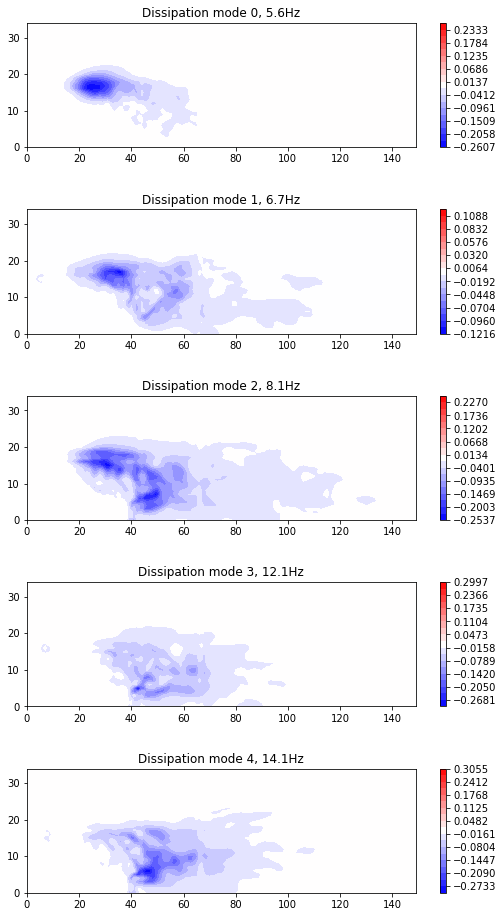

In [7]:
Dissipation = [] #Dissipation term
N_max = []
for i in range(0, int(len_d/2)):
    Dissipation.append(-2/Re * (np.multiply(np.transpose(np.matrix(B[i]).getH()), B[i]) + 
                                np.multiply(np.transpose(np.matrix(D[i]).getH()), D[i]) +
                                np.multiply(np.transpose(np.matrix(A[i]).getH()), A[i]) + 
                                np.multiply(np.transpose(np.matrix(C[i]).getH()), C[i])))
    N_max.append(max(Dissipation[i].max(),-Dissipation[i].min()))
  
fig, axes = plt.subplots(int(len(freqs)), 1, figsize = (10,16))
plt.set_cmap("bwr")
n = 0
for ax in axes.flat:
    levels = np.linspace(-N_max[n], N_max[n], 20)
    cs = ax.contourf(Dissipation[n], levels=levels)
    ax.set_title('Dissipation mode ' + str(n) + ', ' + str(round(float(freqs[n][0]),1)) + 'Hz')
    fig.colorbar(cs, ax=ax)
    n = n+1

fig.subplots_adjust(hspace = 0.5)
fig.subplots_adjust(right=0.8)

plt.plot()
print(np.shape(Dissipation))

[-41.20430396525724, -32.419427533133714, -97.7256585227321, -62.84227646771792, -89.86355425522082]


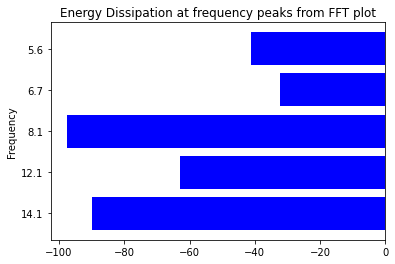

In [8]:
Dissipation_sum = []
for i in range(0, len(freqs)):
    Dissipation_sum.append(Dissipation[i].sum().real)
print(Dissipation_sum)

ind = []
for i in range(0,len(freqs)):
    ind.append(str(round(float(freqs[i][0]),1)))

x=range(len(freqs))

plt.figure()
plt.ylabel('Frequency')
plt.title('Energy Dissipation at frequency peaks from FFT plot')
plt.barh(ind,Dissipation_sum,color='b')
plt.gca().invert_yaxis()

np.savetxt('Dissipation Energy 10deg.csv', Dissipation_sum, delimiter = ',')

In [9]:
# VERIFICATION
#        ^ j
#        |
# ---------------> i
#        |
#        |

test_mode = 0
test_point_x = 10
test_point_y = 10

x_test_y_grad = (Z[test_mode][test_point_y+1][test_point_x]-Z[test_mode][test_point_y-1][test_point_x])/2
x_test_x_grad = (Z[test_mode][test_point_y][test_point_x+1]-Z[test_mode][test_point_y][test_point_x-1])/2

x_y_grad = np.real(A[test_mode][test_point_y][test_point_x])
x_x_grad = np.real(B[test_mode][test_point_y][test_point_x])

test_point_x = 10
test_point_y = 10

y_test_y_grad = (Z[test_mode][test_point_y+1+h_trunc][test_point_x]-Z[test_mode][test_point_y-1+h_trunc][test_point_x])/2
y_test_x_grad = (Z[test_mode][test_point_y+h_trunc][test_point_x+1]-Z[test_mode][test_point_y+h_trunc][test_point_x-1])/2

y_y_grad = np.real(C[test_mode][test_point_y][test_point_x])
y_x_grad = np.real(D[test_mode][test_point_y][test_point_x])

print("X, y-grad ", x_test_y_grad, "|  X, x-grad ", x_test_x_grad)
print("X, y actu ", x_y_grad, "|  X, y actu ", x_x_grad)
if x_test_y_grad == x_y_grad and x_test_x_grad == x_x_grad:
    print("\n Verification in X POD successful, gradients confirmed\n ")
else:
    print("\n Failed to validate X POD\n ")

print("Y, y-grad ",y_test_y_grad, "|  Y, x-grad ", y_test_x_grad)
print("Y, y actu ", y_y_grad, "|  Y, x actu ", y_x_grad)
if y_test_y_grad == y_y_grad and y_test_x_grad == y_x_grad:
    print("\n Verification in Y POD successful, gradients confirmed\n ")
else:
    print("\n Failed to validate Y POD")

X, y-grad  0.0 |  X, x-grad  0.0
X, y actu  0.0 |  X, y actu  0.0

 Verification in X POD successful, gradients confirmed
 
Y, y-grad  0.0 |  Y, x-grad  0.0
Y, y actu  0.0 |  Y, x actu  0.0

 Verification in Y POD successful, gradients confirmed
 
